<a href="https://colab.research.google.com/github/BROJ3/rowingAnalysis/blob/main/logbook_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px


##data loading and overview

In [ ]:
polar=pd.read_csv('Toni_Crnjak_2023-12-29_10-59-56.CSV')
log=pd.read_csv('concept2-result-82727170.csv')
rr=pd.read_csv('Toni_Crnjak_2023-12-29_10-59-56_RR.CSV')

In [ ]:
polar.columns

Index(['Name', 'Sport', 'Date', 'Start time', 'Duration',
       'Total distance (km)', 'Average heart rate (bpm)',
       'Average speed (km/h)', 'Max speed (km/h)', 'Average pace (min/km)',
       'Max pace (min/km)', 'Calories', 'Fat percentage of calories(%)',
       'Average cadence (rpm)', 'Average stride length (cm)', 'Running index',
       'Training load', 'Ascent (m)', 'Descent (m)', 'Average power (W)',
       'Max power (W)', 'Notes', 'Height (cm)', 'Weight (kg)', 'HR max',
       'HR sit', 'VO2max', 'Unnamed: 27'],
      dtype='object')

In [ ]:
rr.columns

Index(['duration', 'offline'], dtype='object')

In [ ]:
log.columns

Index(['Number', 'Time (seconds)', 'Distance (meters)', 'Pace (seconds)',
       'Watts', 'Cal/Hr', 'Stroke Rate', 'Heart Rate'],
      dtype='object')

##Polar Data Analysis

In [ ]:
polar.head()

,Name,Sport,Date,Start time,Duration,Total distance (km),Average heart rate (bpm),Average speed (km/h),Max speed (km/h),Average pace (min/km),...,Descent (m),Average power (W),Max power (W),Notes,Height (cm),Weight (kg),HR max,HR sit,VO2max,Unnamed: 27
0,Toni Crnjak,ROWING,29/12/2023,10:59:56,01:39:59,NaN,143,NaN,NaN,NaN,...,NaN,NaN,NaN,"4x20min\r\nborg 14\r\n1:54,6 21\r\n1:54,5 21\r...",182.0,78.0,199.0,40.0,68.0,NaN
1,Sample rate,Time,HR (bpm),Speed (km/h),Pace (min/km),Cadence,Altitude (m),Stride length (m),Distances (m),Temperatures (C),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,00:00:00,67,NaN,NaN,NaN,NaN,NaN,NaN,21.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,00:00:01,68,NaN,NaN,NaN,NaN,NaN,NaN,21.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,00:00:02,68,NaN,NaN,NaN,NaN,NaN,NaN,21.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


removing GPS related columns, as it's redundant in "indoor rowing"

In [ ]:
columns_of_interest = ['Name', 'Sport', 'Date', 'Start time', 'Duration', 'Average heart rate (bpm)',
                       'Calories', 'Fat percentage of calories(%)',
                       'Average cadence (rpm)','Training load','Notes', 'Height (cm)', 'Weight (kg)',
                       'HR max','HR sit', 'VO2max', 'Unnamed: 27']

polar[columns_of_interest]

,Name,Sport,Date,Start time,Duration,Average heart rate (bpm),Calories,Fat percentage of calories(%),Average cadence (rpm),Training load,Notes,Height (cm),Weight (kg),HR max,HR sit,VO2max,Unnamed: 27
0,Toni Crnjak,ROWING,29/12/2023,10:59:56,01:39:59,143,1467.0,30.0,NaN,227.0,"4x20min\r\nborg 14\r\n1:54,6 21\r\n1:54,5 21\r...",182.0,78.0,199.0,40.0,68.0,NaN
1,Sample rate,Time,HR (bpm),Speed (km/h),Pace (min/km),Altitude (m),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,00:00:00,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,00:00:01,68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,00:00:02,68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5996,NaN,01:39:54,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5997,NaN,01:39:55,109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5998,NaN,01:39:56,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5999,NaN,01:39:57,114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Removing many more, as there seem to be no more than three columns with data

In [ ]:
columns_of_interest = ['Sport', 'Date']

polar=polar[columns_of_interest]

In [ ]:
polar.head()

,Sport,Date
0,ROWING,29/12/2023
1,Time,HR (bpm)
2,00:00:00,67
3,00:00:01,68
4,00:00:02,68


In [ ]:
polar=polar[2:]

In [ ]:
polar.head()

,Sport,Date
2,00:00:00,67
3,00:00:01,68
4,00:00:02,68
5,00:00:03,69
6,00:00:04,69


In [ ]:
polar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 2 to 6000
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Sport   5999 non-null   object
 1   Date    5999 non-null   object
dtypes: object(2)
memory usage: 93.9+ KB


In [ ]:
polar.describe()

,Sport,Date
count,5999,5999
unique,5999,106
top,00:00:00,153
freq,1,502


In [ ]:
polar.dtypes

Sport    object
Date     object
dtype: object

not changine the column "Date" which contains heart rate to numerical data gives random readings at points in the record. Changing the name of the column to "HR" will make more sense as well.

In [ ]:
polar

,Sport,Date
2,00:00:00,67
3,00:00:01,68
4,00:00:02,68
5,00:00:03,69
6,00:00:04,69
...,...,...
5996,01:39:54,107
5997,01:39:55,109
5998,01:39:56,112
5999,01:39:57,114


In [ ]:
polar.rename(columns={'Date': 'HR'}, inplace=True)


In [ ]:
polar.head()

,Sport,HR
2,00:00:00,67
3,00:00:01,68
4,00:00:02,68
5,00:00:03,69
6,00:00:04,69


In [ ]:
polar.rename(columns={'Sport': 'Time'}, inplace=True)


In [ ]:
polar

,Time,HR
2,00:00:00,67
3,00:00:01,68
4,00:00:02,68
5,00:00:03,69
6,00:00:04,69
...,...,...
5996,01:39:54,107
5997,01:39:55,109
5998,01:39:56,112
5999,01:39:57,114


In [ ]:
px.line(x=polar['Time'],y=polar['HR'].astype(int))

In [ ]:
px.scatter(x=polar['Time'],y=polar['HR'].astype(int))

In [ ]:
rr.head()

,duration,offline
0,840,False
1,821,False
2,839,False
3,857,False
4,910,False


In [ ]:
rr['offline'].unique()

array([False])

In [ ]:
rr.drop('offline',axis=1,inplace=True)

In [ ]:
len(polar)

5999

In [ ]:
px.line(rr.astype(int))

In [ ]:
window_size=30

rolling_mean = rr['duration'].rolling(window=window_size).mean()

print(rolling_mean)

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
            ...    
14159    630.333333
14160    625.100000
14161    620.666667
14162    615.000000
14163    610.266667
Name: duration, Length: 14164, dtype: float64


In [ ]:
px.line(rolling_mean)

still not conclusive, I might want to completely cut out those values that appear to be 800 surrounded by 400s, as it seems more likiely to be a double-count

In [ ]:
log.isna().sum()

Number               0
Time (seconds)       0
Distance (meters)    0
Pace (seconds)       0
Watts                1
Cal/Hr               1
Stroke Rate          5
Heart Rate           1
dtype: int64

##Logbook Analysis

In [ ]:
log[1280:1330]

,Number,Time (seconds),Distance (meters),Pace (seconds),Watts,Cal/Hr,Stroke Rate,Heart Rate
1280,1281,1134.3,4970.7,115.6,227.0,1079.0,21.0,159.0
1281,1282,1137.1,4982.9,115.6,227.0,1079.0,21.0,159.0
1282,1283,1139.8,4995.0,113.3,241.0,1128.0,22.0,160.0
1283,1284,1142.5,5006.9,113.3,241.0,1128.0,22.0,160.0
1284,1285,1145.2,5018.5,113.3,241.0,1128.0,22.0,160.0
1285,1286,1147.9,5030.5,113.6,239.0,1121.0,22.0,159.0
1286,1287,1150.6,5042.6,113.2,241.0,1130.0,22.0,158.0
1287,1288,1153.4,5054.9,113.8,237.0,1117.0,22.0,158.0
1288,1289,1156.2,5067.0,114.5,233.0,1102.0,22.0,160.0
1289,1290,1159.0,5079.4,114.4,234.0,1104.0,21.0,161.0


In [ ]:
log.columns

Index(['Number', 'Time (seconds)', 'Distance (meters)', 'Pace (seconds)',
       'Watts', 'Cal/Hr', 'Stroke Rate', 'Heart Rate'],
      dtype='object')

In [ ]:
log['Pace'] = log['Pace (seconds)'].apply(lambda x: '{:02d}:{:02d}'.format(int(x // 60), int(x % 60)))

I want it to be miliseconds too

In [ ]:
log.drop('Pace', axis=1, inplace=True)

In [ ]:
log.head()

,Number,Time (seconds),Distance (meters),Pace (seconds),Watts,Cal/Hr,Stroke Rate,Heart Rate
0,1,1.0,3.5,148.5,107.0,667.0,NaN,NaN
1,2,2.7,9.8,148.5,107.0,667.0,NaN,71.0
2,3,3.5,13.6,127.3,170.0,883.0,24.0,71.0
3,4,6.1,25.0,114.6,233.0,1100.0,23.0,74.0
4,5,8.7,36.8,114.6,233.0,1100.0,23.0,78.0


In [ ]:
log['Pace'] = log['Pace (seconds)'].apply(lambda x: '{:02d}:{:02d}:{:03d}'.format(int(x // 60), int(x % 60), int((x % 1) * 1000)))


In [ ]:
log.drop('Pace (seconds)', axis=1, inplace=True)


In [ ]:
log.drop('Cal/Hr', axis=1, inplace=True)


In [ ]:
log.head()

,Number,Time (seconds),Distance (meters),Watts,Stroke Rate,Heart Rate,Pace
0,1,1.0,3.5,107.0,NaN,NaN,02:28:500
1,2,2.7,9.8,107.0,NaN,71.0,02:28:500
2,3,3.5,13.6,170.0,24.0,71.0,02:07:299
3,4,6.1,25.0,233.0,23.0,74.0,01:54:599
4,5,8.7,36.8,233.0,23.0,78.0,01:54:599


In [ ]:
log.dtypes

Number                 int64
Time (seconds)       float64
Distance (meters)    float64
Watts                float64
Stroke Rate          float64
Heart Rate           float64
Pace                  object
dtype: object

<Axes: >

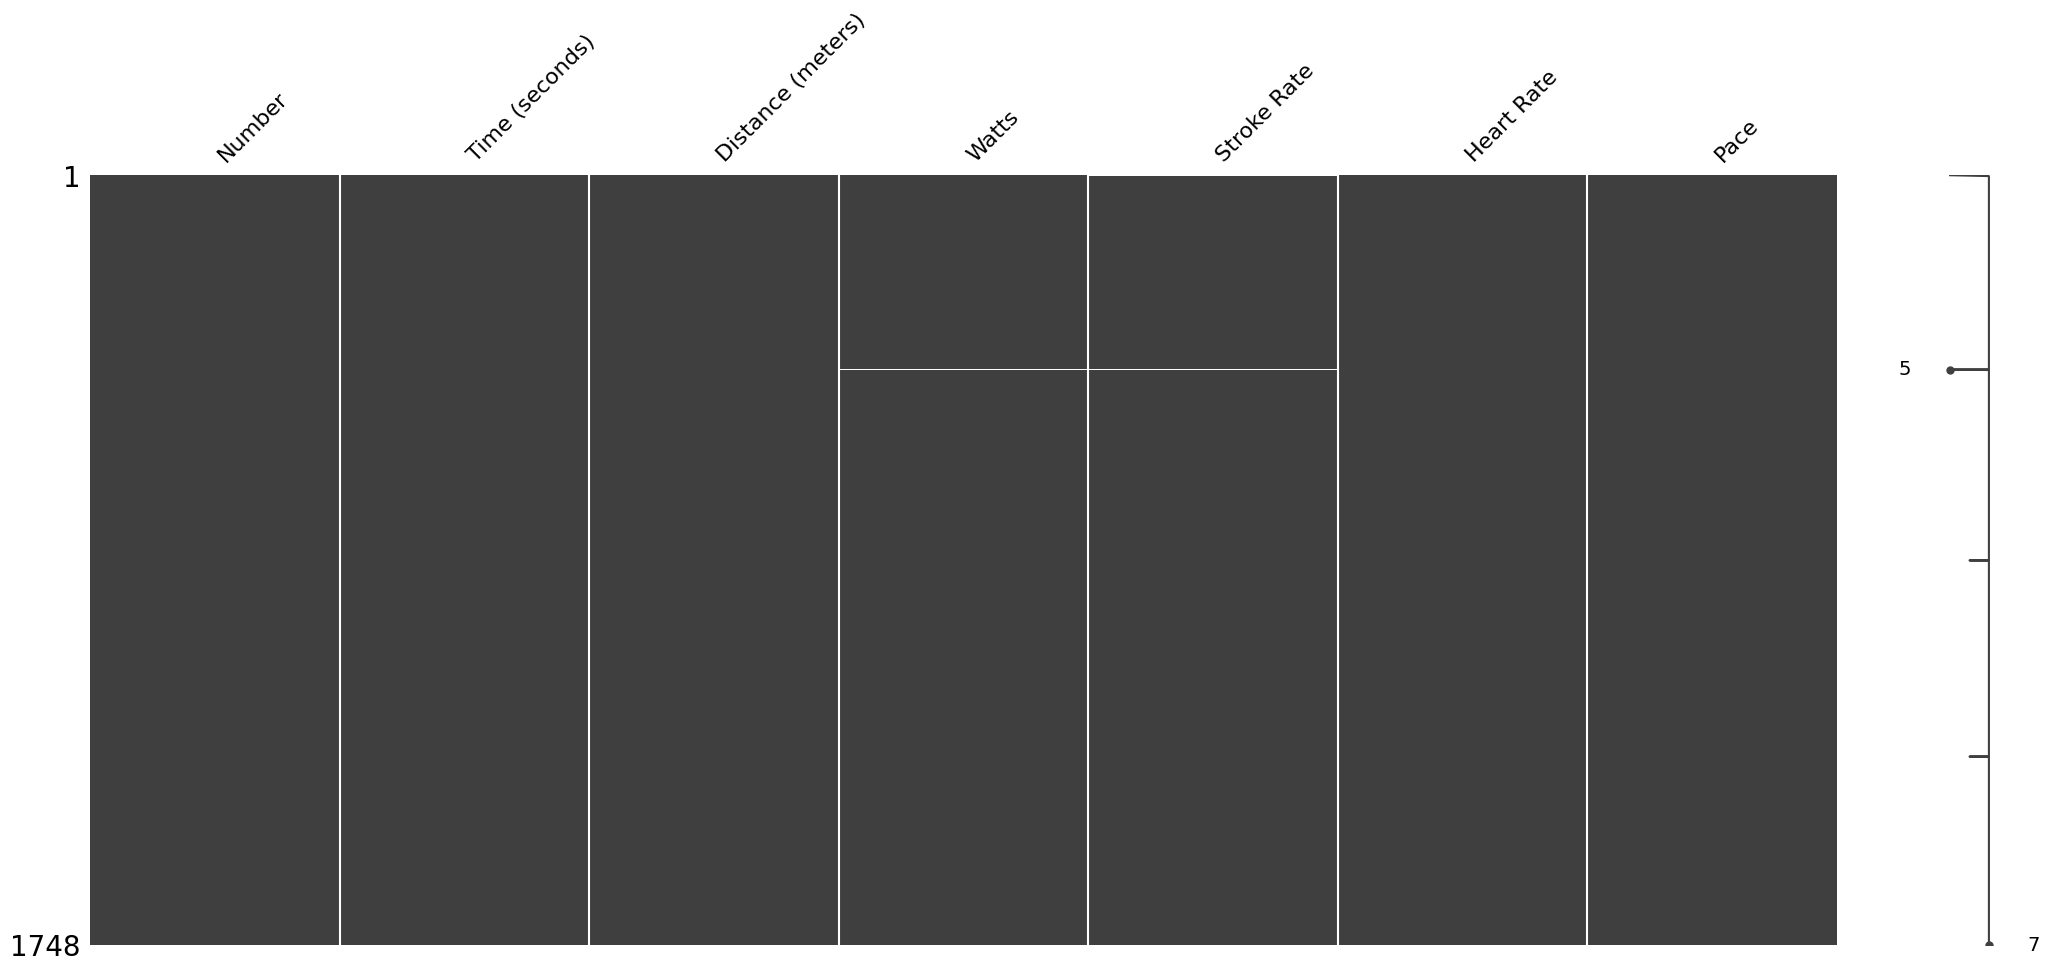

In [ ]:
#check for nans
import missingno as msno

msno.matrix(log)

we're interested in plotting Pace, Heart Rate, Stroke Rate, maybe Watts

In [ ]:
px.line(x=log['Number'],y=log['Pace'])

converting Pace from string object into numerical

In [ ]:
def convert_to_fraction(time_str):
    minutes, seconds, milliseconds = map(int, time_str.split(':'))
    total_seconds = minutes * 60 + seconds + milliseconds / 1000
    return total_seconds / 60  # Representing as a fraction of a minute

log['Pace'] = log['Pace'].apply(convert_to_fraction)



In [ ]:
px.line(x=log['Number'],y=log['Pace']) #would like pace numbers, but looks ok


In [ ]:
log.head()

,Number,Time (seconds),Distance (meters),Watts,Stroke Rate,Heart Rate,Pace
0,1,1.0,3.5,107.0,NaN,NaN,2.475000
1,2,2.7,9.8,107.0,NaN,71.0,2.475000
2,3,3.5,13.6,170.0,24.0,71.0,2.121650
3,4,6.1,25.0,233.0,23.0,74.0,1.909983
4,5,8.7,36.8,233.0,23.0,78.0,1.909983


In [ ]:
px.line(x=log['Number'],y=log['Heart Rate']) #looks good


In [ ]:
px.line(x=log['Number'],y=log['Stroke Rate']) #little binary, but good


In [ ]:
px.line(x=log['Number'],y=log['Watts']) #looks good


next is trimming the fat, visualizing them on one graph, and maybe adding a radio select button for different things

##Putting it all together

In [ ]:
from plotly.subplots import make_subplots


In [ ]:
rr.head()

,duration
0,840
1,821
2,839
3,857
4,910


In [ ]:
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Watts", "Heart Rate"))

fig.add_trace(
    px.line(x=log['Number'], y=log['Watts']).data[0],
    row=1, col=1
)

fig.add_trace(
    px.line(x=log['Number'], y=log['Heart Rate']).data[0],
    row=2, col=1
)

fig.add_trace(
    px.line(x=log['Number'], y=log['Stroke Rate']).data[0],
    row=2, col=1
)



fig.update_layout(height=600, width=800, title_text="Combined Plots")
fig.show()

In [ ]:
import plotly.graph_objects as go


fig = make_subplots(rows=1, cols=1, shared_xaxes=True, subplot_titles=("Watts, Heart Rate, Stroke Rate"))

fig.add_trace(
    go.Scatter(x=log['Number'], y=log['Watts'], name='Watts'),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=log['Number'], y=log['Heart Rate'], name='Heart Rate'),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=log['Number'], y=log['Stroke Rate'], name='Stroke Rate'),
    row=1, col=1
)

fig.update_layout(
    height=600,
    width=800,
    title_text="Combined Plots",
    yaxis=dict(title='Watts', domain=[.5, 0.5]),
    yaxis2=dict(title='Heart Rate and Stroke Rate', side='right', overlaying='y', anchor='x', domain=[1, 1])
)

fig.show()


In [ ]:
fig = make_subplots(rows=1, cols=1, shared_xaxes=True, subplot_titles=("Watts", "Heart Rate", "Stroke Rate"))

fig.add_trace(
    go.Scatter(x=log['Number'], y=log['Watts'], name='Watts'),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=log['Number'], y=log['Heart Rate'], name='Heart Rate'),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=log['Number'], y=log['Stroke Rate'], name='Stroke Rate'),
    row=1, col=1
)

fig.update_layout(
    height=600,
    width=800,
    title_text="Combined Plots",
    yaxis=dict(title='Watts', domain=[0.5, 1.0]),
    yaxis2=dict(title='Heart Rate and Stroke Rate', side='right', overlaying='y', anchor='x', domain=[0, 0.5]),
    margin=dict(b=0)
)

fig.show()


In [ ]:

fig = make_subplots(rows=1, cols=1, shared_xaxes=True)
#add traces
fig.add_trace(
    go.Scatter(x=log['Number'], y=log['Watts'], name='Watts', visible=True),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=log['Number'], y=log['Heart Rate'], name='Heart Rate', visible='legendonly'),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=log['Number'], y=log['Stroke Rate'], name='Stroke Rate', visible='legendonly'),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=rr.index, y=rr['duration'], name='RR', visible='legendonly'),
    row=1, col=1
)

# Create dropdown menu
buttons = [
    dict(label='Watts', method='update', args=[{'visible': [True, False, False, False]}, {'title': 'Watts'}]),
    dict(label='Heart Rate', method='update', args=[{'visible': [False, True, False, False]}, {'title': 'Heart Rate'}]),
    dict(label='Stroke Rate', method='update', args=[{'visible': [False, False, True, False]}, {'title': 'Stroke Rate'}]),
    dict(label='RR', method='update', args=[{'visible': [False, False, False, True]}, {'title': 'RR'}]),
]

fig.update_layout(
    height=600,
    width=800,
    yaxis=dict(title='Values'),
    updatemenus=[
        dict(
            buttons=buttons,
            direction='down',
            showactive=True,
            x=0.1,
            xanchor='left',
            y=1.15,
            yanchor='top'
        ),
    ]
)

fig.show()


ideas
- make a plotly dash dashboard
- make HR zones and make chart showing time spent in each
- possibly future connetion with lactate?
